<a href="https://colab.research.google.com/github/trunghachi/GreenFlower/blob/master/word_representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Word Representation from https://phamdinhkhanh.github.io/2019/04/29/ModelWord2Vec.html

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
words = ['anh', 'em', 'gia đình', 'bạn bè', 'anh', 'em']
le.fit(words)

print('Class of words: ', le.classes_)
# Biến đổi sang dạng số
x = le.transform(words)
print('Convert to number: ', x)
# Biến đổi lại sang class
print('Invert into classes: ', le.inverse_transform(x))


Class of words:  ['anh' 'bạn bè' 'em' 'gia đình']
Convert to number:  [0 2 3 1 0 2]
Invert into classes:  ['anh' 'em' 'gia đình' 'bạn bè' 'anh' 'em']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

oh = OneHotEncoder()
classes_indices = list(zip(le.classes_, np.arange(len(le.classes_))))
print('Classes_indices: ', classes_indices)
oh.fit(classes_indices)
print('One-hot categories and indices:', oh.categories_)
# Biến đổi list words sang dạng one-hot
words_indices = list(zip(words, x))
print('Words and corresponding indices: ', words_indices)
one_hot = oh.transform(words_indices).toarray()
print('Transform words into one-hot matrices: \n', one_hot)
print('Inverse transform to categories from one-hot matrices: \n', oh.inverse_transform(one_hot))


Classes_indices:  [('anh', 0), ('bạn bè', 1), ('em', 2), ('gia đình', 3)]
One-hot categories and indices: [array(['anh', 'bạn bè', 'em', 'gia đình'], dtype=object), array([0, 1, 2, 3], dtype=object)]
Words and corresponding indices:  [('anh', 0), ('em', 2), ('gia đình', 3), ('bạn bè', 1), ('anh', 0), ('em', 2)]
Transform words into one-hot matrices: 
 [[1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]]
Inverse transform to categories from one-hot matrices: 
 [['anh' 0]
 ['em' 2]
 ['gia đình' 3]
 ['bạn bè' 1]
 ['anh' 0]
 ['em' 2]]


In [ ]:
!pip install underthesea

     |████████████████████████████████| 7.5MB 4.4MB/s 
     |████████████████████████████████| 1.3MB 44.3MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 747kB 44.6MB/s 
     |████████████████████████████████| 245kB 42.2MB/s 
     |████████████████████████████████| 753.2MB 21kB/s 
     |████████████████████████████████| 1.1MB 40.7MB/s 
     |████████████████████████████████| 890kB 39.2MB/s 
     |████████████████████████████████| 2.9MB 39.7MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=41e4da1f0377413c05a43e3e3368d9b85a57186aa844a0cabb5dbd42f619e768
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=2c4a8ea38dc27f4d8c7bd1394059a3939863d17c39411e3092395ea104be5244
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123

In [ ]:
import scipy.linalg as ln 
import numpy as np
from underthesea import word_tokenize

sentence = 'Khoa học dữ liệu là một lĩnh vực đòi hỏi kiến thức về toán và lập trình. Tôi rất yêu thích Khoa học dữ liệu.'
token = word_tokenize(sentence)
# Tokenize câu search
print('tokenization of sentences: ', token)

tokenization of sentences:  ['Khoa học', 'dữ liệu', 'là', 'một', 'lĩnh vực', 'đòi hỏi', 'kiến thức', 'về', 'toán', 'và', 'lập trình', '.', 'Tôi', 'rất', 'yêu thích', 'Khoa học', 'dữ liệu', '.']


In [ ]:
from scipy.sparse import coo_matrix
# Tạo ma trận coherence dưới dạng sparse thông qua khai báo vị trí khác 0 của trục x và y
row = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]
col = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]
data =      [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

X = coo_matrix((data, (row, col)), shape=(15, 15)).toarray()
print(X)

[[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Thực hiện phân tích suy biến:
U, S_diag, V = ln.svd(X)
print('Shape of U: ', U.shape)
print('Length of diagonal: ', len(S_diag))
print('Shape of V: ', V.shape)

Shape of U:  (15, 15)
Length of diagonal:  15
Shape of V:  (15, 15)


In [ ]:
import numpy as np
S_truncate = np.zeros(shape = (6, 15))
np.fill_diagonal(S_truncate, S_diag[:6])
print('S truncate: \n', S_truncate)
print('Word Embedding 6 dimensionality: \n', np.dot(S_truncate, V))

S truncate: 
 [[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Word Embedding 6 dimensionality: 
 [[0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from keras.optimizers import RMSprop, Adam

def autoencoder(input_unit, hidden_unit):
    model = Sequential()
    model.add(Dense(input_unit, input_shape = (15,), activation = 'relu'))
    model.add(Dense(hidden_unit, activation = 'relu'))
    model.add(Dense(input_unit, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(),
                 metrics = ['accuracy'])
    model.summary()
    return model

model_auto = autoencoder(input_unit = 15, hidden_unit = 6)

model_auto.fit(X, X, epochs = 5, batch_size = 3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 15)                105       
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
5/5 [==============================] - 1s 3ms/step - loss: 2.8387 - accuracy: 0.0222
Epoch 2/5
5/5 [==============================] - 0s 2ms/step - loss: 2.3578 - accuracy: 0.1380
Epoch 3/5
5/5 [==============================] - 0s 3ms/step - loss: 2.3124 - accuracy: 0.0222
Epoch 4/5
5/5 [==============================] - 0s 2ms/step - loss: 2.6806 - accuracy: 0.0361
Epoch 5/

In [ ]:
embedding_matrix = model_auto.layers[2].get_weights()[0]
bias = model_auto.layers[2].get_weights()[1]

print('Shape of embedding_matrix: ', embedding_matrix.shape)
print('Embedding_matrix: \n', embedding_matrix)

Shape of embedding_matrix:  (6, 15)
Embedding_matrix: 
 [[-4.5710385e-01  1.3637660e-01  3.7350875e-01  3.4085038e-01
   4.7826535e-01 -2.4833240e-02  3.1228599e-01  4.0247890e-01
  -3.5115249e-02 -1.4893259e-01  2.5607732e-01  3.1063601e-04
  -4.7888541e-01  5.1786691e-01 -4.4234085e-01]
 [-8.8111863e-02 -4.4486621e-01  1.7102020e-02  5.0705737e-01
  -1.2758511e-01  4.9646223e-01 -4.5703924e-01 -3.9525250e-01
   9.7152032e-02 -1.6107951e-01 -3.6072952e-01 -1.7451541e-02
  -2.3617947e-01 -3.2011402e-01 -2.7804896e-01]
 [ 2.2994721e-01  4.3530560e-01 -4.1886833e-01  4.5217678e-01
   3.5582727e-01 -4.1541064e-01 -8.5472845e-02  5.0418812e-01
   1.9523335e-01  5.1320767e-01  3.0193558e-01 -7.9136342e-03
   1.0971300e-01 -1.1650929e-01 -1.7923751e-01]
 [-2.9922342e-01 -3.7155688e-01  1.9838841e-01 -6.4846747e-02
  -3.3185798e-01  3.4755009e-01  2.1325352e-02  1.6160752e-01
   5.2371579e-01 -3.2111749e-03  3.4440181e-01 -3.8893864e-01
  -3.2466993e-01  1.3111177e-01  4.2463216e-01]
 [ 6.633

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm

def cosine(x, y):
    cos_sim = np.dot(x, y)/(norm(x)*norm(y))
    return cos_sim
# Véc tơ biểu diễn từ khoa học
e0 = list(embedding_matrix[:, 0])
# Véc tơ biểu diễn từ dữ liệu
e1 = list(embedding_matrix[:, 1])
# Quan hệ tương quan ngữ nghĩa giữa từ khoa học và dữ liệu
cosine(e0, e1)

0.47501302

In [ ]:
# Từ có khoảng cách lớn nhất với từ khoa học theo thứ tự
cosines = [cosine(e0, embedding_matrix[:, i]) for i in np.arange(15)]
print('cosines: ', cosines)
np.argsort([cosine(e0, embedding_matrix[:, i]) for i in np.arange(15)])[::-1]

cosines:  [1.0, 0.47501302, -0.5493009, -0.24871396, -0.16882728, -0.5470442, -0.13223119, -0.05308816, -0.10048421, 0.4966199, -0.09994887, 0.18250734, 0.84556746, -0.6654595, 0.066298455]


array([ 0, 12,  9,  1, 11, 14,  7, 10,  8,  6,  4,  3,  5,  2, 13])

# Word2vec

## Bước 1: Tạo từ điển

In [ ]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence
from nltk.corpus import gutenberg
from string import punctuation
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
norm_bible = gutenberg.sents('bible-kjv.txt') 
norm_bible = [' '.join(doc) for doc in norm_bible]
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index

# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
vocab_size = len(word2id)

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Vocabulary Size: 12746
Vocabulary Sample: [('the', 1), ('and', 2), ('of', 3), ('to', 4), ('that', 5), ('in', 6), ('he', 7), ('shall', 8), ('unto', 9), ('for', 10)]


## Bước 2: Mã hoá toàn bộ các câu văn bằng index.

In [ ]:
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]
print('Embedding sentence by index: ', wids[:5])

Embedding sentence by index:  [[1, 53, 1342, 6058], [1, 280, 2678, 3, 1, 53, 1342, 6058], [1, 254, 448, 3, 162, 194, 8769], [43, 43, 6, 1, 734, 27, 1368, 1, 205, 2, 1, 139], [43, 48, 2, 1, 139, 26, 258, 2085, 2, 2086, 2, 551, 26, 46, 1, 266, 3, 1, 1030]]


## Bước 3: Xác định Context --> Target.

In [ ]:
import numpy as np
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        # print('words: ', words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = [] 
            # Start index of context
            start = index - window_size
            # End index of context
            end = index + window_size + 1
            # List of context_words
            context_words.append([words[i] for i in range(start, end) if 0 <= i < sentence_length and i != index])
            # List of label_word (also is target word).
            # print('context words {}: {}'.format(context_words, index))
            label_word.append(word)
            # Padding the input 0 in the left in case it does not satisfy number of context_words = 2*window_size.
            x = sequence.pad_sequences(context_words, maxlen=context_length)
            # print('context words padded: ', x)
            # Convert label_word into one-hot vector corresponding with its index
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)
            
            
# Test this out for some samples
i = 0
window_size = 2 # context window size
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['the', 'old', 'of', 'the'] -> Target (Y): testament
Context (X): ['old', 'testament', 'the', 'king'] -> Target (Y): of
Context (X): ['testament', 'of', 'king', 'james'] -> Target (Y): the
Context (X): ['of', 'the', 'james', 'bible'] -> Target (Y): king
Context (X): ['the', 'first', 'of', 'moses'] -> Target (Y): book
Context (X): ['first', 'book', 'moses', 'called'] -> Target (Y): of
Context (X): ['book', 'of', 'called', 'genesis'] -> Target (Y): moses
Context (X): ['1', '1', 'the', 'beginning'] -> Target (Y): in
Context (X): ['1', 'in', 'beginning', 'god'] -> Target (Y): the
Context (X): ['in', 'the', 'god', 'created'] -> Target (Y): beginning
Context (X): ['the', 'beginning', 'created', 'the'] -> Target (Y): god


## Bước 4: Xây dựng mạng nơ ron gồm 3 layers chính:

Embedding layer: dùng để mã hoá đầu vào thành các one-hot véc tơ. Số lượng từ ở đầu vào chính là 2*window_size. Sau khi mã hoá, qua quá trình training mỗi một từ vựng sẽ được biểu diễn bởi một véc tơ nhúng 100 chiều tương ứng với embed_size.
Mean layer: Tính véc tơ trung bình của các véc tơ đầu ra ở Embedding layer. Số lượng véc tơ là 2*window_size.
Dense layer: Tính phân phối xác xuất của từ Target dựa vào hàm softmax.

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
embed_size = 100

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            1274600   
_________________________________________________________________
lambda (Lambda)              (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 12746)             1287346   
Total params: 2,561,946
Trainable params: 2,561,946
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print('number of window: ', len(wids))


number of window:  30103


## Bước 5: Huấn luyện mô hình. 
Chúng ta sẽ huấn luyện mô hình dựa trên 100 câu văn đầu tiên và trải qua 5 epochs.

In [ ]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids[:100], window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 500 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)

Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000 (context, word) pairs
Processed 2500 (context, word) pairs
Epoch: 1 	Loss: 20381.339057028294
Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000 (context, word) pairs
Processed 2500 (context, word) pairs
Epoch: 2 	Loss: 17202.120052218437
Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000 (context, word) pairs
Processed 2500 (context, word) pairs
Epoch: 3 	Loss: 16379.310061559081
Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000 (context, word) pairs
Processed 2500 (context, word) pairs
Epoch: 4 	Loss: 15567.846531778574
Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000

## Bước 6: Trích xuất ma trận nhúng của các từ.

In [ ]:
import pandas as pd
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()


(12745, 100)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
and,-0.174165,-0.063822,0.305682,-0.129642,-0.474484,0.109544,0.291508,-0.625555,-0.319643,-0.146942,0.527215,-0.363833,-0.168716,0.009517,-0.321934,-0.331385,-0.093987,0.045994,-0.045901,0.268133,-0.213596,0.066872,-0.481769,0.069016,-0.290829,0.176083,0.047188,-0.172513,-0.124460,0.258850,0.151776,0.056428,0.306783,-0.234796,0.090639,-0.098114,-0.096069,0.068440,-0.307928,0.250268,...,0.136678,0.185197,-0.063017,-0.035304,0.056663,-0.006995,-0.093538,0.059816,0.319433,-0.700160,0.224535,-0.021988,0.273491,0.255238,-0.194397,-0.081870,-0.024385,0.186537,-0.109554,0.029254,0.778938,-0.608922,-0.200541,-0.271270,-0.123018,0.432078,0.154745,-0.022569,0.316961,0.261395,-0.132290,-0.098971,0.033723,0.030183,-0.200391,0.058879,0.149272,0.479433,0.204126,0.777097
of,-0.090846,-0.175164,-0.442010,-0.013573,-0.055629,0.118096,0.376133,-0.460013,-0.005129,0.022540,0.036364,-0.073816,-0.113738,0.026863,-0.463848,-0.037831,0.184645,-0.274103,0.086699,-0.162517,-0.221973,0.081224,-0.142764,0.073115,0.105382,0.095279,-0.083502,0.041074,0.089867,-0.198816,0.203450,0.133081,0.252221,-0.896949,0.086407,-0.147757,0.040708,0.622325,0.277127,0.013862,...,-0.146326,-0.053859,0.035312,0.098230,-0.042671,-0.095430,0.112066,0.188601,0.303919,0.059489,0.687602,-0.397082,-0.066953,0.149050,-0.087039,-0.118994,-0.146032,0.748103,-0.017916,0.060508,0.130677,-0.357195,0.022824,-0.061892,-0.347332,-0.046408,0.499997,-0.039043,0.176881,0.010419,0.019872,0.180331,-0.232061,0.157660,-0.194886,-0.085244,0.154849,0.347828,0.047647,0.301733
to,-0.119218,-0.046323,-0.581406,-0.252867,-0.007689,0.064402,0.101480,-0.279862,-0.159458,-0.165170,-0.193688,-0.376131,0.156756,-0.181204,-0.641110,0.040666,-0.031761,-0.014076,-0.053418,-0.137756,0.074456,0.171095,0.114714,-0.163437,0.229654,0.033202,-0.104749,0.152151,0.149906,-0.075600,0.010086,0.528265,-0.071942,-0.462355,0.014845,-0.068399,-0.125582,-0.302177,-0.108413,-0.151451,...,-0.036079,0.025415,-0.083480,-0.052953,-0.031651,-0.117602,0.247594,0.029516,0.111236,0.043111,0.300878,-0.153106,-0.192241,0.274321,0.006930,-0.094067,-0.160363,0.621428,0.091545,-0.221804,0.040056,0.073310,-0.152801,-0.056969,-0.029636,0.038825,0.337642,0.143470,-0.045011,-0.092308,0.123755,-0.061171,-0.211318,0.017173,-0.318532,-0.303251,0.225820,0.188696,0.152195,0.088640
that,-0.093615,-0.032653,-0.025385,0.018768,-0.078177,0.064099,0.209154,-0.180818,-0.068139,0.103987,-0.120559,-0.006583,-0.009840,-0.070138,-0.145713,0.015771,0.044901,-0.022386,-0.030903,0.037759,-0.016769,0.005529,-0.094002,0.033058,-0.042852,0.047525,-0.088438,0.054379,0.020636,-0.077262,0.023376,0.114570,-0.007696,-0.148720,-0.021701,-0.060020,-0.032234,-0.009235,0.040473,-0.066276,...,-0.013769,0.026570,-0.014131,0.095704,-0.015051,0.029500,0.086795,0.058553,0.103425,-0.080309,0.181327,-0.152638,-0.103660,0.088559,-0.055853,-0.055279,-0.107276,0.110441,-0.151441,-0.100677,-0.084205,0.032814,0.111858,-0.013872,-0.060110,0.057995,0.252581,-0.029353,-0.015761,-0.052892,0.035620,0.067076,-0.031382,0.053417,-0.032456,-0.083740,0.005829,0.092708,0.012419,0.066568
in,0.127555,-0.023785,-0.001758,-0.205759,-0.084542,0.068577,0.239442,-0.238108,-0.058259,-0.037175,0.029379,-0.101301,-0.034792,-0.090113,-0.160627,-0.164604,0.099454,-0.073309,-0.001546,0.010160,0.118459,0.056896,0.025117,-0.048889,-0.001416,0.117017,-0.061175,-0.017258,-0.002963,0.143477,0.050192,0.004583,-0.019565,-0.203265,-0.161039,-0.044636,-0.060317,0.043246,-0.080028,0.082179,...,-0.040953,0.044966,0.041482,0.121832,-0.016653,-0.072153,-0.045871,0.016922,-0.076238,0.005847,0.157454,-0.212193,-0.064430,0.084612,-0.119276,-0.061387,-0.025075,0.027538,-0.082187,-0.065353,0.082050,-0.027151,-0.010977,-0.071115,-0.097857,0.147750,0.069914,0.071602,0.107828,-0.134767,0.054662

## Thể hiện cấu trúc của mô hình

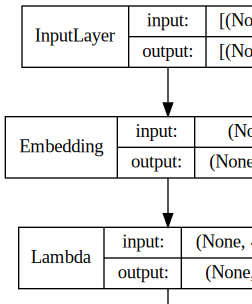

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

## Hoàn toàn tương tự như kiến trúc của CBOW, ta xây dựng model skip-grams như sau:

## Bước 1: Chuẩn bị dữ liệu là các cặp [context, target]

In [ ]:
from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=window_size) for wid in wids[:100]]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(james (1342), occasion (2282)) -> 0
(king (53), strip (4318)) -> 0
(king (53), answered (232)) -> 0
(james (1342), swaddling (8484)) -> 0
(the (1), worse (1988)) -> 0
(bible (6058), james (1342)) -> 1
(king (53), bullocks (1389)) -> 0
(james (1342), kareah (3158)) -> 0
(bible (6058), pleiades (7936)) -> 0
(king (53), james (1342)) -> 1


## Bước 2: Xây dựng mạng nơ ron

In [ ]:
from keras.layers import Input, Dot, dot, concatenate
# from keras.engine.input_layer import Input
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential, Model, Input

# build skip-gram architecture
word_input = Input(shape = (1,))
word_embed = Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1, name = 'word_embedding')(word_input)
word_output = Reshape((embed_size, ))(word_embed)
word_model = Model(word_input, word_output)

print('word_model: \n', word_model.summary())
context_input = Input(shape = (1,))
context_embed = Embedding(vocab_size, embed_size,
                  embeddings_initializer="glorot_uniform",
                  input_length=1, name = 'context_embedding')(context_input)
context_output = Reshape((embed_size,))(context_embed)
context_model = Model(context_input, context_output)
print('context_model: \n', context_model.summary())

concate = dot([word_output, context_output], axes = -1)
dense = Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid")(concate)
model = Model(inputs = [word_input, context_input], outputs = dense)
model.compile(loss="mean_squared_error", optimizer="rmsprop")

# view model summary
print('model merge word and context: \n', model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
word_embedding (Embedding)   (None, 1, 100)            1274600   
_________________________________________________________________
reshape (Reshape)            (None, 100)               0         
Total params: 1,274,600
Trainable params: 1,274,600
Non-trainable params: 0
_________________________________________________________________
word_model: 
 None
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
context_embedding (Embedding (None, 1, 100)            1274600   
_______________

## Biểu diễn kiến trúc của mô hình

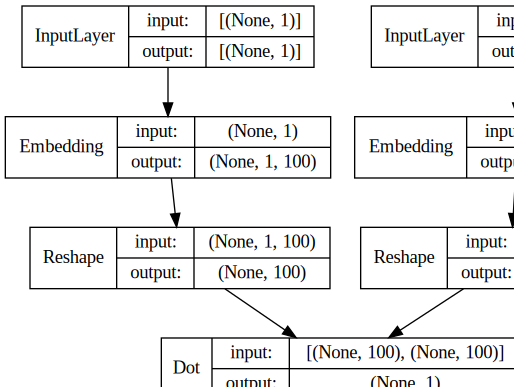

In [ ]:
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))


## Bước 3: Huấn luyện mô hình.

Để cho nhanh ta sẽ training trên 100 skip_grams đầu tiên.

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams[:100]):
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 500 == 0:
            print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += model.train_on_batch(X,Y)  

    print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 24.906560748815536
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 2 Loss: 23.876232892274857
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 3 Loss: 21.584625020623207
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 4 Loss: 18.76884099841118
Processed 0 (skip_first, skip_second, relevance) pairs
Epoch: 5 Loss: 15.90737385302782


## Bước 4: Trích xuất ra véc tơ nhúng ở layer đầu tiên.

In [ ]:
import pandas as pd

word_embedding_layer = model.get_layer('word_embedding')
weights = word_embedding_layer.get_weights()[0]

print(weights.shape)
pd.DataFrame(weights, index=id2word.values()).head()

(12746, 100)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
the,-0.012044,0.019198,0.007073,-0.013681,0.015124,-0.007346,0.017240,0.018487,-0.014790,0.011445,0.006384,0.018480,0.006845,0.006080,0.013151,-0.003769,-0.016630,0.014412,-0.021564,-0.019722,0.013694,-0.011118,-0.014382,0.017908,0.012392,-0.018910,-0.004939,0.007581,0.015749,-0.005116,0.005769,-0.009105,-0.003811,0.000153,0.004242,0.015081,0.015593,-0.003927,-0.017008,-0.004584,...,0.017533,0.000488,0.009680,0.013766,0.018690,0.016383,0.005604,0.020443,-0.014396,0.009194,-0.010337,0.021327,0.011156,-0.014086,0.014528,-0.009188,-0.004807,-0.014238,0.000959,-0.005866,-0.002730,0.001932,-0.000844,-0.006053,-0.004763,-0.018170,0.021163,0.018995,0.002935,-0.014240,0.006210,-0.013202,0.020816,-0.008717,0.014306,-0.021592,-0.005027,-0.013784,0.007823,-0.002134
and,0.397865,-0.377752,-0.341829,0.353048,-0.326999,0.285504,0.327806,0.387368,0.398001,0.327070,0.362766,0.349497,0.181637,-0.372802,-0.384828,0.397169,0.339491,-0.366489,0.386026,-0.406289,0.388367,-0.373759,0.106662,-0.383491,-0.324158,-0.350180,-0.402786,0.401596,0.384007,0.386818,0.395440,-0.382734,0.394118,0.392931,0.346130,0.382741,-0.376507,0.369230,-0.393327,0.327388,...,-0.397734,-0.363275,-0.399981,-0.360737,0.365701,-0.374867,0.370131,-0.391806,0.380814,0.382974,-0.386416,-0.380167,0.385971,-0.338481,0.360552,0.366449,-0.345355,0.377054,0.378908,-0.395801,0.399568,0.386298,-0.282107,0.290844,-0.387824,0.383898,-0.381582,0.405954,-0.383009,0.394318,-0.397350,-0.386760,0.367012,0.374787,-0.062901,-0.380691,-0.349140,0.383632,0.415055,0.390777
of,0.407229,0.058817,0.341515,0.418108,-0.416203,0.406274,0.408926,0.351413,0.420778,0.401644,0.370293,-0.275674,0.395392,-0.412598,-0.375126,0.299669,0.419740,-0.408397,0.396304,-0.360372,0.399887,-0.416993,-0.388500,-0.430070,-0.426729,-0.433804,-0.438356,0.435881,0.429687,0.440018,0.433936,-0.414249,0.345637,0.447333,0.204712,-0.201109,-0.446582,0.441781,-0.427165,0.405514,...,-0.438127,-0.382004,-0.420848,-0.167617,0.384356,-0.442676,0.422957,0.286465,0.388234,0.358923,-0.439020,-0.420663,0.329519,-0.316222,0.427519,0.409289,-0.403531,0.419849,0.433559,-0.353053,0.361016,0.389113,-0.411289,0.386415,-0.440109,0.349841,-0.396004,0.445101,-0.374906,0.433711,-0.407264,-0.430501,0.436257,-0.331304,0.417410,-0.423647,0.357565,0.353301,0.369371,0.439020
to,0.309908,0.099762,0.264870,0.303282,-0.305559,0.262531,0.275440,0.269295,0.286492,0.320941,0.236706,-0.265686,0.282884,-0.305714,-0.268608,0.279896,0.278158,-0.301526,0.270075,-0.254989,0.303287,-0.246401,-0.084537,-0.320314,-0.235564,-0.305323,-0.295779,0.289173,0.302411,0.293852,0.307516,-0.267629,0.293652,0.327314,-0.258904,-0.262256,-0.315829,0.280034,-0.289997,0.316455,...,-0.268506,-0.290050,-0.316989,0.146863,0.313699,-0.275477,0.290026,0.104249,0.222247,-0.008668,-0.317426,-0.299863,0.113492,-0.214120,0.284263,0.290178,-0.257389,0.297467,0.302484,-0.304517,0.212612,0.304048,-0.297412,0.275650,-0.314645,0.295395,-0.299332,0.311467,-0.293368,0.294285,-0.286672,-0.307619,0.315744,-0.182492,0.294696,-0.296565,0.246236,0.289303,0.286713,0.299939
that,0.183322,0.022625,0.029729,0.157262,-0.190340,0.179988,0.194140,0.151936,0.180073,0.181102,0.121072,-0.077323,0.174236,-0.168686,-0.175827,0.157195,0.185889,-0.162311,0.164476,-0.171810,0.181877,-0.169797,0.124561,-0.196202,-0.180244,-0.162839,-0.183264,0.188229,0.195891,0.173805,0.168614,-0.176443,0.144065,0.171897,0.052628,-0.068634,-0.182075,0.173160,-0.152627,0.155885,...,-0.190550,-0.155113,-0.186377,-0.148630,0.199291,-0.171765,0.134589,0.071497,0.170886,0.117690,-0.173805,-0.151083,0.113567,-0.129593,0.165616,0.182173,-0.177386,0.196794,0.186126,-0.191022,0.127322,0.167761,-0.156348,0.141336,-0.168029,0.124332,-0.177675,0.184972,-0.169538,0.166816,-0.181075,-0.158585,0.175424,-0.139187,0.13126

## Tìm các từ gần nghĩa nhất với 2 từ ['egypt', 'king'] dựa trên khoảng cách euclidean.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['egypt', 'king']}

similar_words

(12746, 12746)


{'egypt': ['come', 'from', 'earth', 'hearken', 'nor'],
 'king': ['by', 'out', 'son', 'lord', 'these']}

# Biểu diễn t-SNE
t-SNE là một thuật toán giảm chiều dữ liệu dimensionality reduction rất hiệu quả. Thông thường đối với những véc tơ nhiều hơn 3 chiều chúng ta sẽ tìm cách giảm chúng về 2 hoặc 3 chiều bằng thuật toán t-SNE và biểu diễn chúng trong không gian để nhận biết mối liên hệ, tính chất.

Tiếp theo chúng ta sẽ biểu diễn các từ trong không gian 2 chiều dựa trên thuật toán t-SNE.

Total words: 12 	Word Embedding shapes: (12, 100)


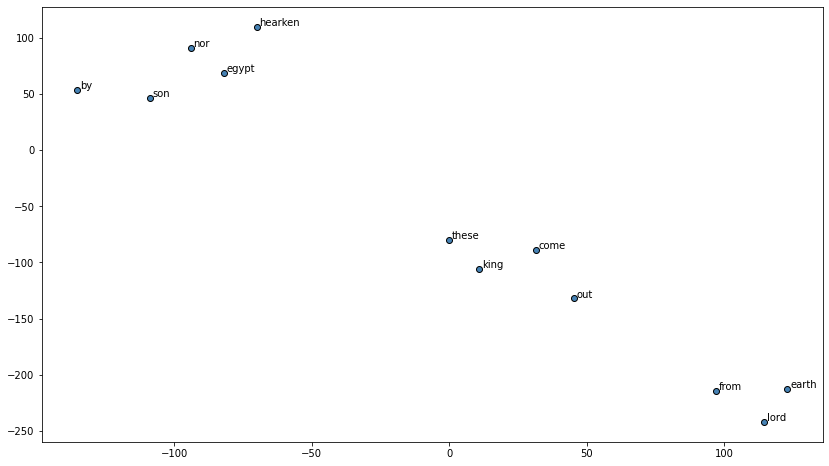

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')


# Sử dụng gensim cho mô hình word2vec

Cách training trên chỉ sử dụng để chúng ta hiểu rõ cơ chế hoạt động của 2 phương pháp skip-grams và CBOW trong mô hình word2vec. Trên thực tế mô hình có thể được training trên gensim với chỉ 1 vài dòng rất đơn giản như sau. Trong đó có một số tham số quan trọng trong Word2Vec:

1. size: Kích thước của ma trận nhúng.
2. window: Kích thước cửa sổ được sử dụng để khởi tạo các n-gram.
3. sg: Nhận 2 giá trị {0, 1}. Nếu là 0: phương pháp CBOW, nếu là 1: skip-grams.
4. wokers: Số core CPU được huy động để huấn luyện. Càng nhiều core tốc độ huấn luyện càng nhanh.


In [ ]:
from gensim.models import Word2Vec
# Training model với 1000 câu đầu tiên trong kinh thánh
sentences = [[item.lower() for item in doc.split()] for doc in norm_bible[:1000]]
model = Word2Vec(sentences, min_count = 1, size = 150, window = 10, sg = 1, workers = 8)
model.train(sentences, total_examples = model.corpus_count, epochs = 10)

(209770, 336740)

In [ ]:
# Lấy véc tơ biểu diễn của từ king
print('embedding vector shape: ', model.wv['king'].shape)
model.wv['king']

embedding vector shape:  (150,)


array([-0.32769266,  0.03325617,  0.16099454, -0.43923625, -0.5774205 ,
        0.32666007,  0.00803816,  0.01739315, -0.17381752,  0.47398144,
        0.10426191, -0.30574593, -0.01257783,  0.45202482, -0.06158702,
        0.40313822,  0.12463704,  0.09550165, -0.37712634,  0.2617265 ,
       -0.30980474, -0.14957416, -0.3931157 ,  0.07375994,  0.41351643,
       -0.19939345,  0.3283562 ,  0.16446988, -0.3300091 , -0.04926994,
       -0.15286638,  0.19007151,  0.55644476,  0.1945966 ,  0.4461981 ,
       -0.18473591,  0.22609885, -0.9014331 ,  0.01548504, -0.21673821,
        0.10287414, -0.25499648,  0.01149429,  0.579976  ,  0.26826152,
        0.31048036, -0.2894414 ,  0.15242869, -0.01445581, -0.22635837,
        0.17343895,  0.03684635, -0.09589378,  0.2466696 ,  0.06005651,
        0.18786697, -0.00684533, -0.07377088,  0.13694996,  0.00549853,
       -0.26337558, -0.55286056,  0.70527333, -0.2520205 ,  0.01884417,
       -0.02746831,  0.02288482,  0.32463688, -0.18272272, -0.15

In [ ]:
# Lấy các từ có mối liên hệ gần nhất với 1 từ dựa trên khoảng cách
model.most_similar('king')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('admah', 0.869554877281189),
 ('elam', 0.8658518195152283),
 ('chedorlaomer', 0.8654919266700745),
 ('arioch', 0.8652955889701843),
 ('ellasar', 0.861585259437561),
 ('tidal', 0.8593940734863281),
 ('shinar', 0.8454746007919312),
 ('amraphel', 0.84051114320755),
 ('zeboiim', 0.8353822827339172),
 ('shinab', 0.8315096497535706)]

# Mục mới